In [90]:
class TickerPlot():
    
    def __init__(self, start=None, end=None):
        import datetime, time
        
        if end is None:
            end = datetime.datetime.today()
        if start is None:
            start = datetime.datetime(2010,1,1)
        
        self.start = start
        self.end = end
        
    def plot(self, ticker, metric=None):
        import datetime as dt
        import matplotlib.pyplot as plt
        import pandas as pd
        from matplotlib import style
        from pip._internal import main
        
        try:
            import yfinance
        except: 
            main(['install', 'yfinance'])
            import yfinance   

        try:
            import pandas_datareader.data as web
        except: 
            main(['install', 'pandas_datareader'])
            import pandas_datareader.data as web
        
        style.use('ggplot')
        r = yfinance.Ticker(ticker)
        history = r.history(start=self.start, end=self.end, interval="1d", frequency="1d")
        df = pd.DataFrame(history)
        df.insert(0, 'symbol', ticker)
        df = df.dropna(subset=['Close'])
        df = df.reset_index()
        df = df.rename(columns={ "Date": "date", 
                           "High": "high",
                           "Low": "low",
                           "Open": "open",
                           "Close": "close",
                           "Volume": "volume"})
        df = df[['symbol', 'date', 'high', 'low', 'open', 'close', 'volume']]
        df = df.set_index('symbol')
        df['date'] = pd.to_datetime(df['date'])
        if metric is None:
            df.plot(x='date')
            plt.show()
        else:
            try:
                if type(metric) is list:
                    metric.append('date')
                else:
                    metric = [metric, 'date']
                df[metric].plot(x='date')
                plt.show()
            except:
                print("Metric '", metric, "' could not be found!")
                

In [91]:
import datetime as dt
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

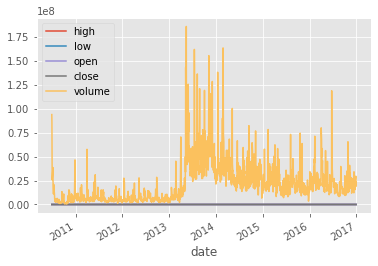

In [92]:
plotter = TickerPlot(start=start, end=end)
plotter.plot('TSLA')

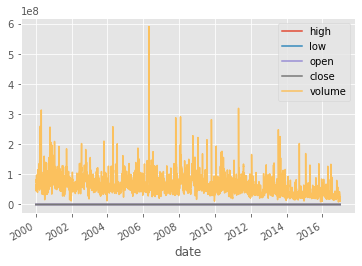

In [93]:
plotter.plot('MSFT')

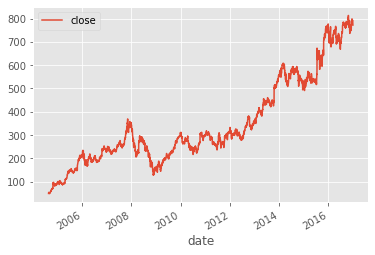

In [94]:
plotter.plot('GOOG', metric='close')

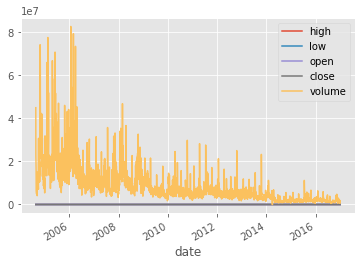

In [95]:
plotter.plot('GOOG')

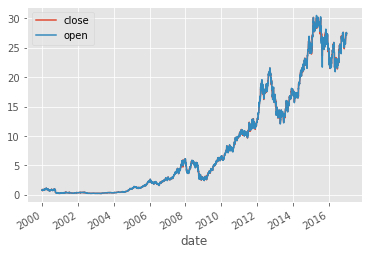

In [96]:
plotter.plot('AAPL', metric=['close', 'open'])

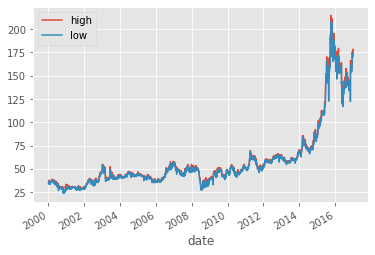

In [100]:
plotter.plot('COKE', metric=['high', 'low'])

## Jonathan Doolittle